In [1]:
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [2]:
def rescale(array):
    """Rescales an array between 0. and 1."""
    mn = array.min()
    mx = array.max()
    array_ = array.copy()
    array_ -= mn
    array_ /= (mx-mn)
    return array_

def test_rescale():
    array = np.random.randn(10, 1000)
    assert((array.min(), array.max()) != (0., 1.))
    array = rescale(array)
    assert((array.min(), array.max()) == (0., 1.))
test_rescale()

In [7]:
from sklearn.datasets import make_multilabel_classification, make_blobs

In [153]:
make_blobs??

In [3]:
n_features = 300
n_concepts = 50
n_clusters = 4

In [4]:
def simulate_distance_matrix(n_features, n_concepts, n_clusters, seed=4324):
    """
    Simulate `n_concepts` clustered in `n_clusters`, each of which has `n_features`.
    
    Arguments
    ---------
    n_features : int
    n_concepts : int
    n_clusters : int
    seed : int
    
    Results
    -------
    dist_x : np.array (n_concepts, n_concepts)
        a correlation matrix ordered according to the clusters
    """
    X, y = make_blobs(n_samples=n_concepts*n_clusters, n_features=n_features, 
                      centers=n_clusters, random_state=seed)
    dist_x = 1. - pdist(X, metric='correlation')
    y_sort = np.argsort(y)
    dist_x = squareform(dist_x)[y_sort, :][:, y_sort]
    return dist_x

In [5]:
def normalize_distance_matrix(dist):
    """
    Normalizes a distance matrix across columns. 
    
    Arguments
    ---------
    dist : np.array (n_concepts, n_concepts)
    
    Returns
    -------
    dist_normalized : np.array (n_concepts, n_concepts)
        a normalized version of dist across columns.
    """
    dist_ = dist.copy()
    dist_ = np.apply_along_axis(rescale, 0, dist_)
    dist_ /= dist_.sum(axis=0)
    return dist_

In [8]:
dist = simulate_distance_matrix(n_features, n_concepts, n_clusters)

In [9]:
dist_norm = normalize_distance_matrix(dist)

In [12]:
%matplotlib inline

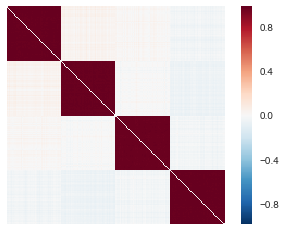

In [13]:
sns.heatmap(dist, xticklabels=False, yticklabels=False, square=True)

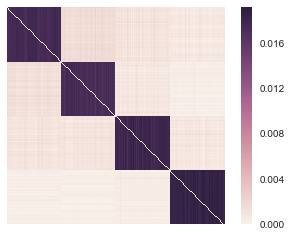

In [14]:
sns.heatmap(dist_norm, xticklabels=False, yticklabels=False, square=True)

In [198]:
dist_x.sum(axis=0), dist_x.sum(axis=1)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

In [130]:
import networkx as nx

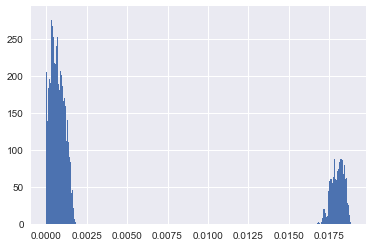

In [188]:
plt.hist(dist_x[np.triu_indices_from(dist_x)], bins=1000);

In [189]:
dist_x.mean()

0.0049999999999999992

In [190]:
dist_x_thresh = (dist_x > dist_x.mean()).astype(int)

In [191]:
dist_x_thresh

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [192]:
G = nx.from_numpy_matrix(dist_x_thresh)

/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is dep

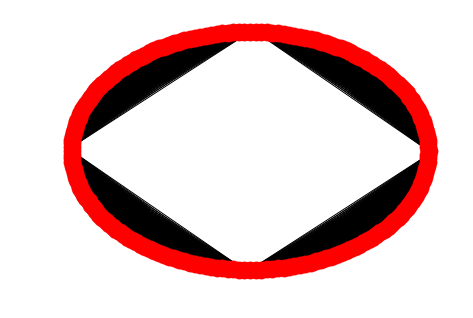

In [197]:
nx.draw_circular(G)

In [199]:
A = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]])

/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is dep

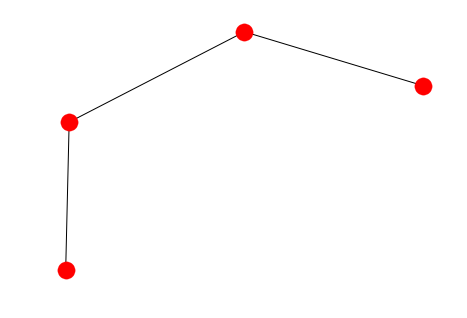

In [209]:
G = nx.from_numpy_matrix(A)
nx.draw(G)

In [345]:
# XXX: optimize this
def compute_paths(A, depth):
    """Compute paths of length `depth` in a graph with adjacency matrix A
    
    Arguments
    ---------
    A : numpy array (n_nodes, n_nodes)
        a binary adjacency matrix
    depth : int
        desired length of the paths
        
    Returns
    -------
    A_ : numpy array (n_nodes, n_nodes)
        an adjacency matrix with A_[i, j] = 1 if there exists a path of length `depth`
        connecting nodes `i` and `j`.
    """
    if depth == 1:
        return A
    As = [A]
    for i_depth in range(1, depth):
        B = A @ As[-1]
        for A_ in As:
            B[A_ > 0.] = 0.
        B[B > 1] = 1.    
        np.fill_diagonal(B, 0)
        As.append(B)
    return As[-1]

In [331]:
from numpy.testing import assert_array_equal

In [333]:
def test_compute_paths():
    A = np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0]
    ])
    A2 = np.array([
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]
    ])
    A3 = np.array([
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]]    
    )
    A4 = np.zeros((4, 4))
    
    assert_array_equal(A, compute_paths(A, 1))
    assert_array_equal(A2, compute_paths(A, 2))
    assert_array_equal(A3, compute_paths(A, 3))
    for i in range(4, 9):
        assert_array_equal(A4, compute_paths(A, i))
test_compute_paths()

In [340]:
def compute_decay(gamma, A, depth):
    """
    Compute decay in a graph, i.e. gamma^depth * A^depth
    
    Arguments
    ---------
    gamma : float
        decay parameter
    A : np.array (n_nodes, n_nodes)
        adjacency matrix of a graph
    depth : int
        depth of the activation
        
    Returns
    -------
    D : np.array (n_nodes, n_nodes)
        amount of decay for each node in the graph
    """
    return gamma**depth * compute_paths(A, depth)

In [211]:
G_AA = nx.from_numpy_matrix(AA)

/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/contematto/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is dep

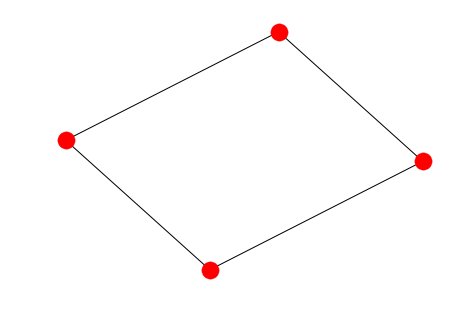

In [212]:
nx.draw(G_AA)